# Importamos las librearías

In [1]:
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt
import random
from scipy.integrate import solve_ivp
import pandas as pd
import os

In [3]:
pathcampo = '../Base de datos/Campo 5 puntos'
pathtrayec = '../Base de datos/Trayectorias 10 eval'

# Vemos las gráficas de las bases de datos

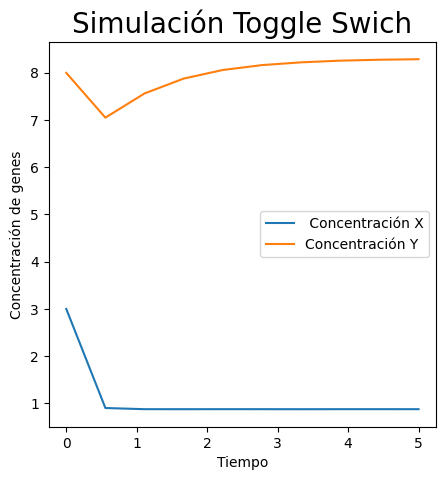

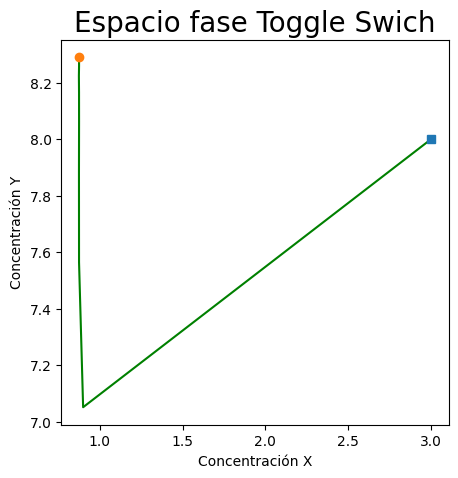

--------------------------------------------
[0, 10, 7, 2, 8, 1, 4]


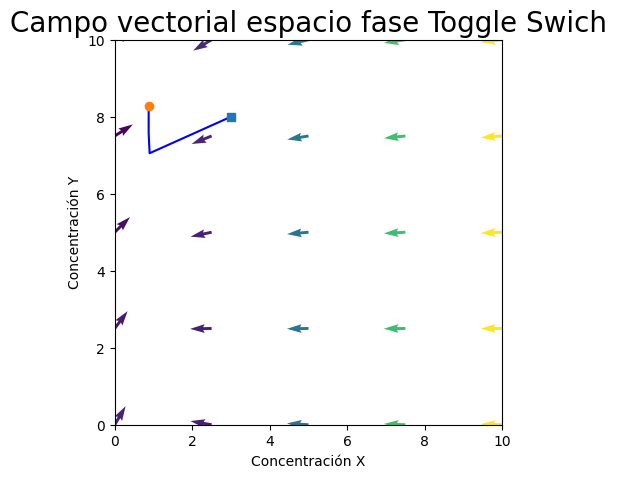

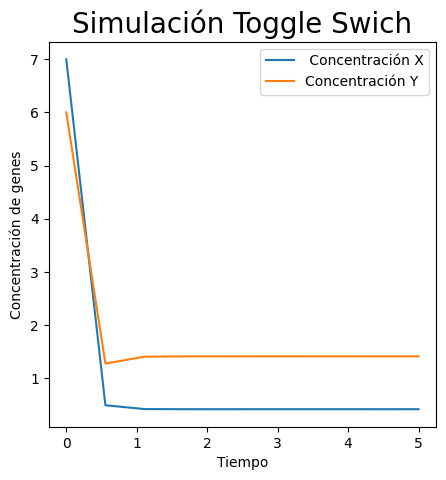

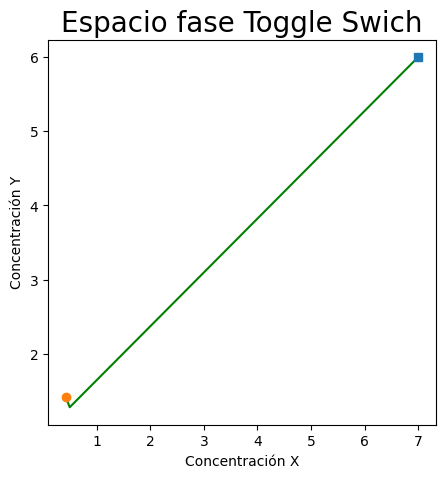

--------------------------------------------
[3, 10, 3, 2, 9, 8, 3]


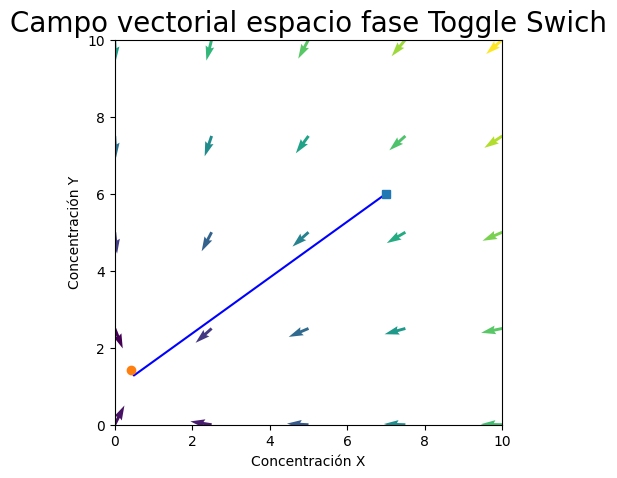

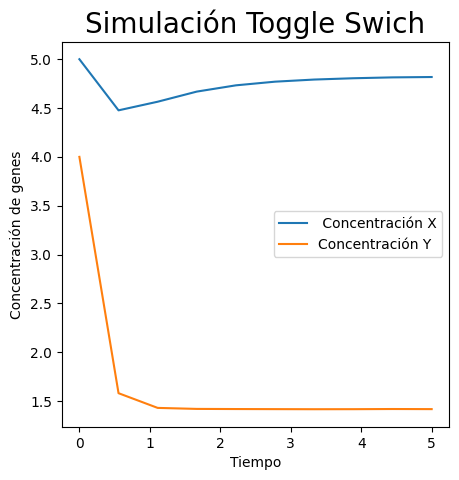

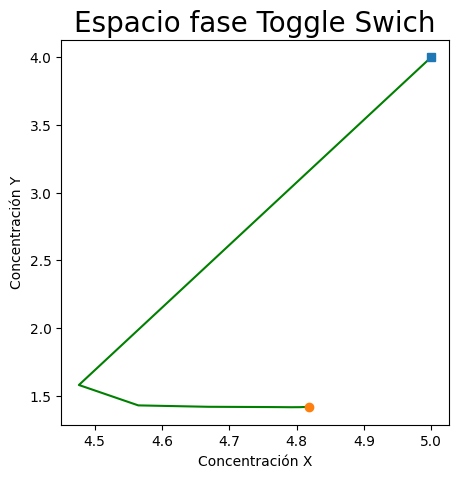

--------------------------------------------
[7, 9, 3, 7, 1, 5, 3]


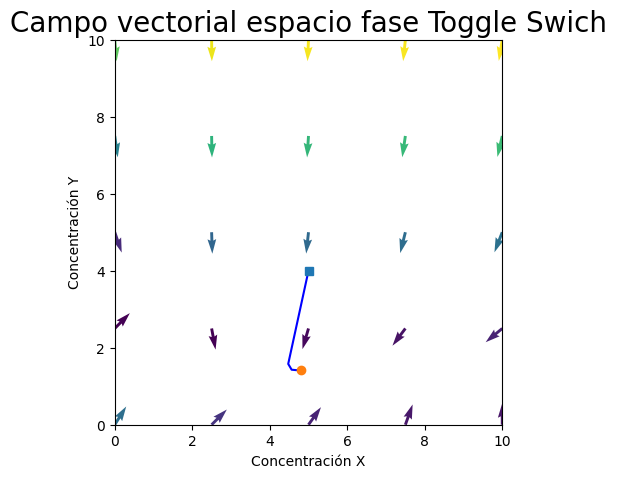

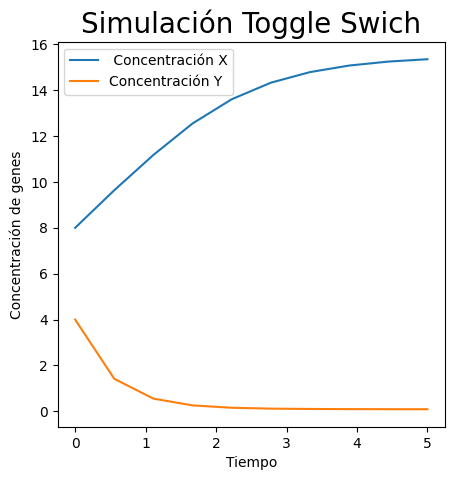

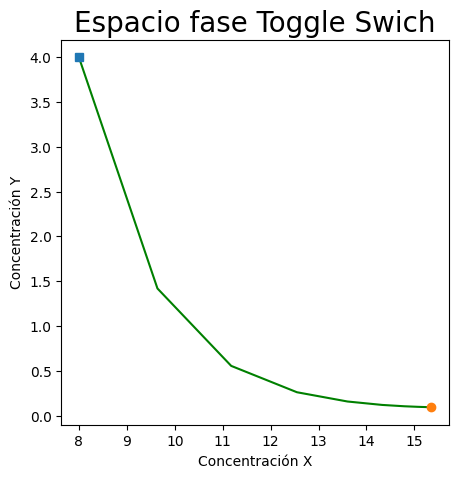

--------------------------------------------
[6, 3, 10, 0, 1, 2, 1]


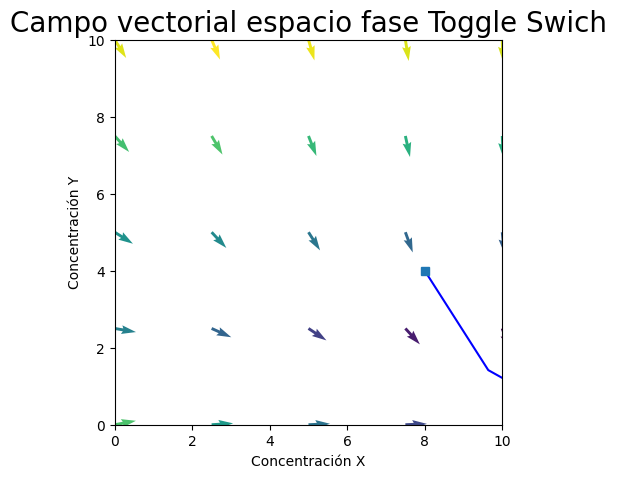

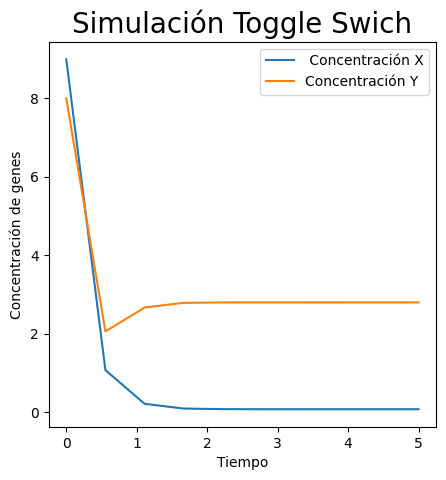

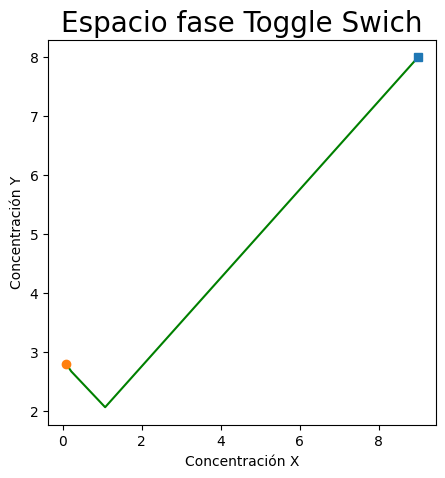

--------------------------------------------
[7, 7, 0, 7, 4, 5, 3]


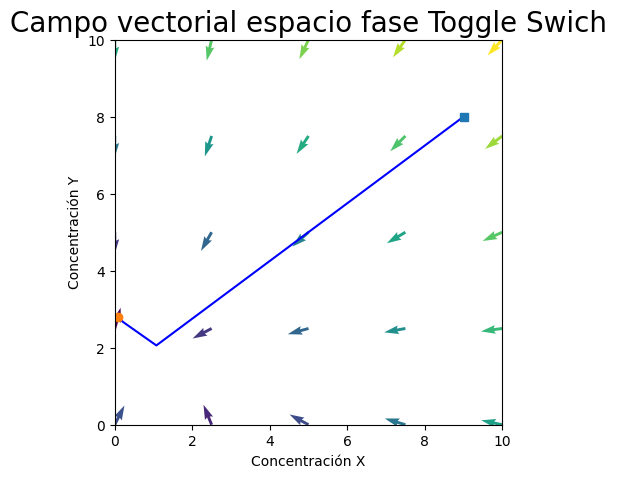

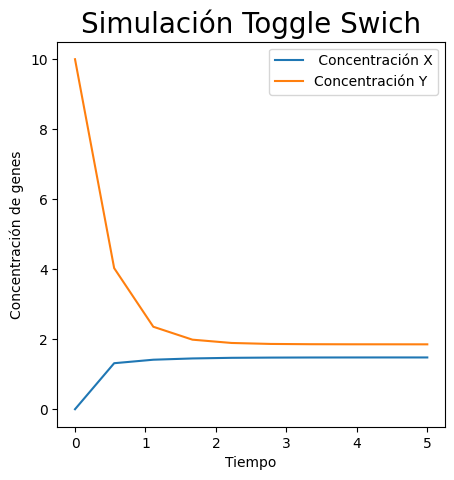

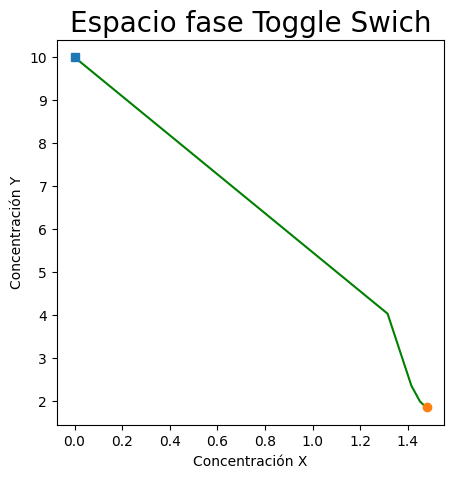

--------------------------------------------
[5, 9, 7, 4, 5, 3, 4]


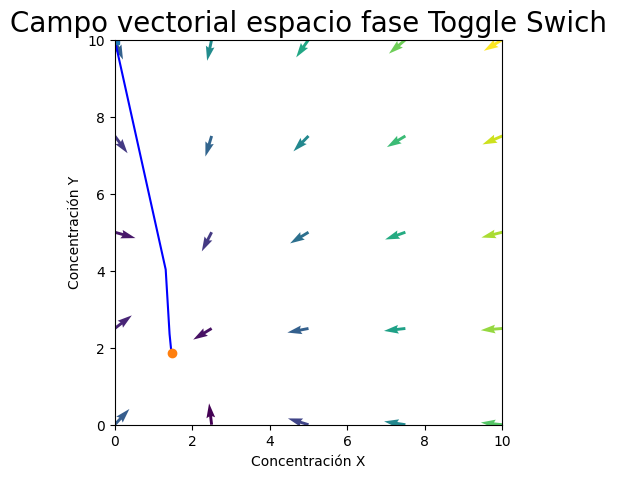

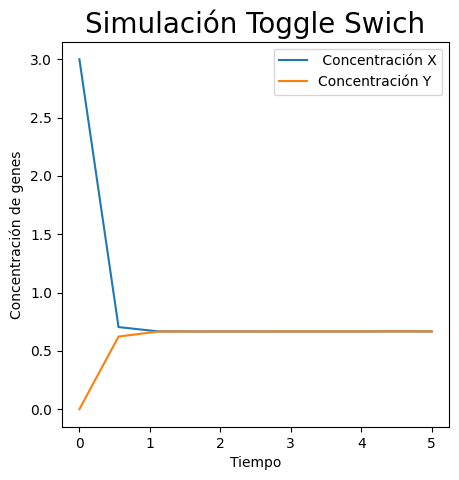

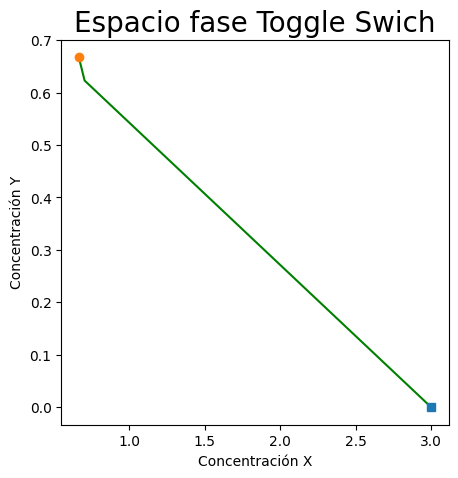

--------------------------------------------
[5, 10, 3, 0, 9, 9, 1]


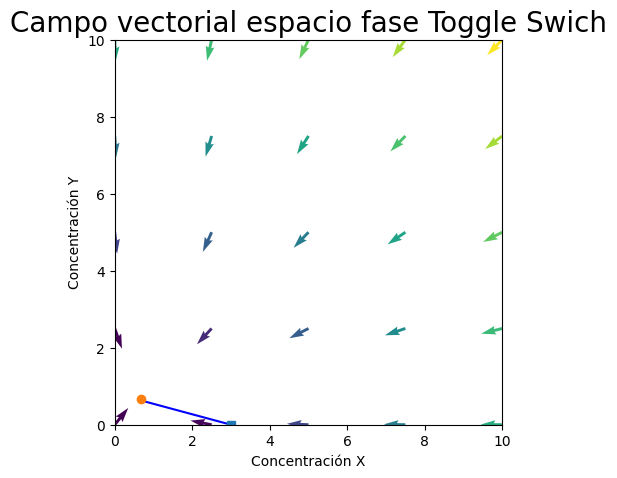

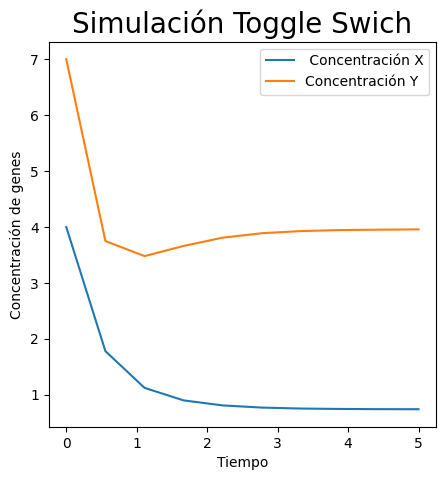

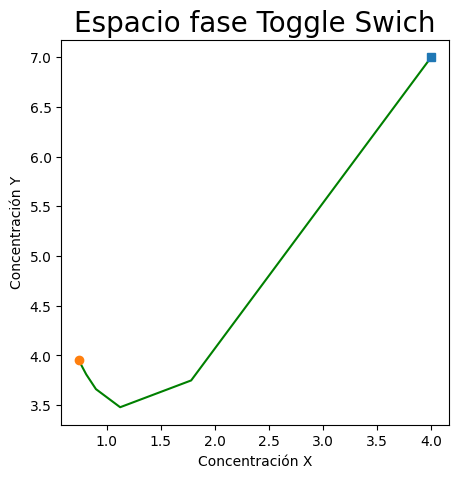

--------------------------------------------
[8, 6, 1, 8, 2, 3, 2]


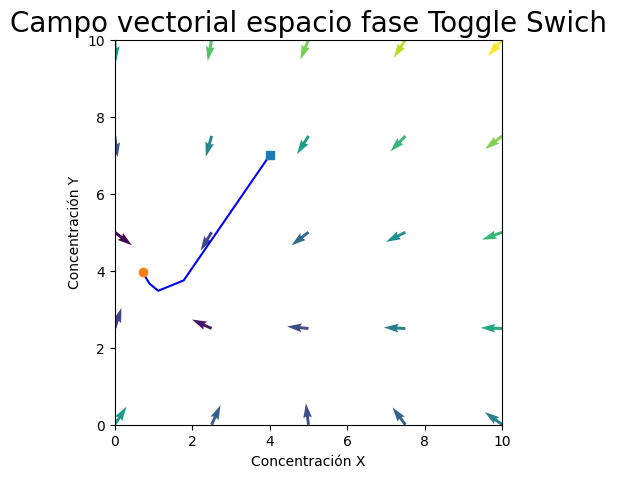

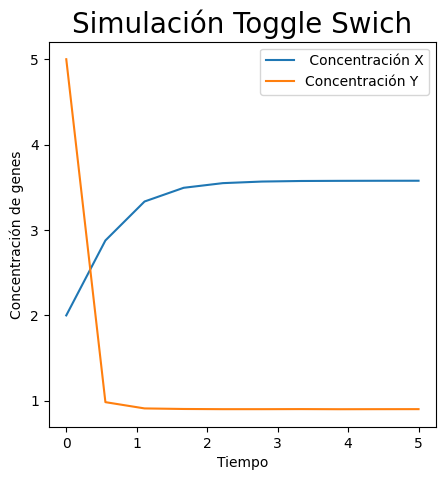

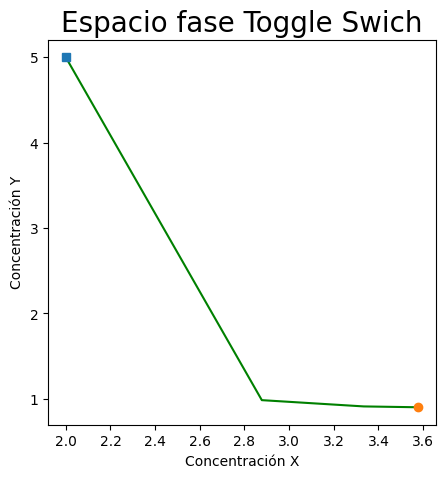

--------------------------------------------
[2, 10, 6, 7, 2, 8, 3]


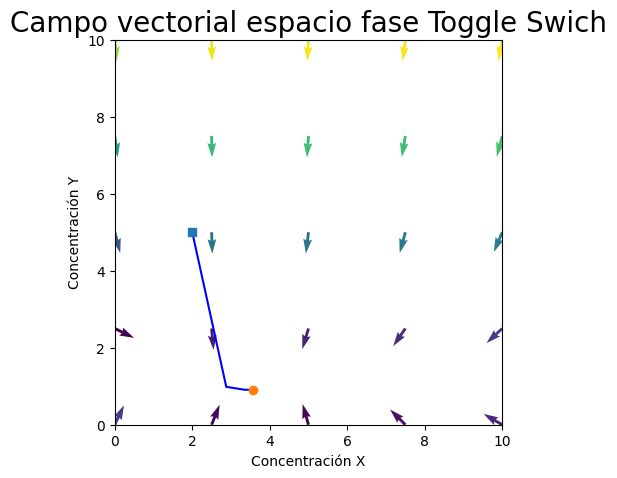

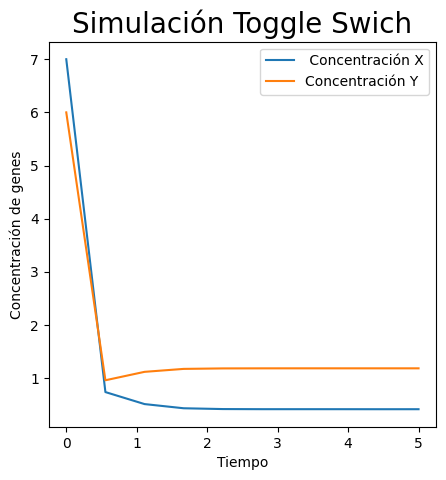

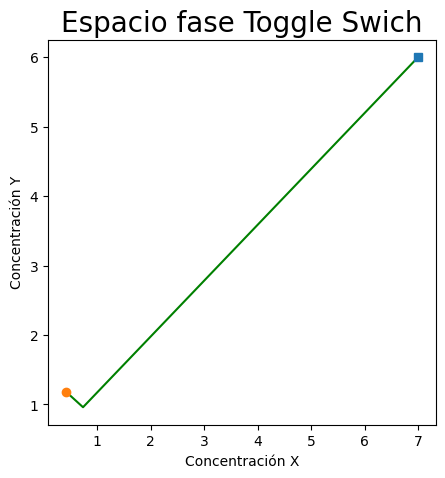

--------------------------------------------
[5, 6, 1, 0, 6, 5, 5]


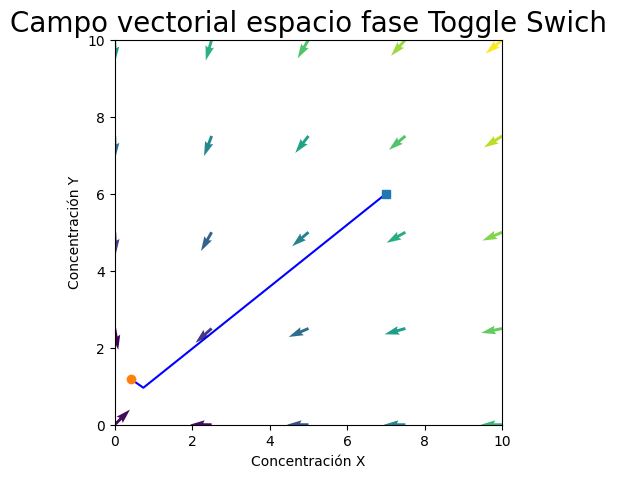

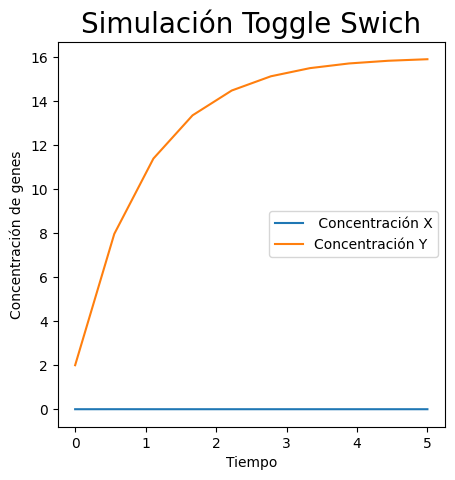

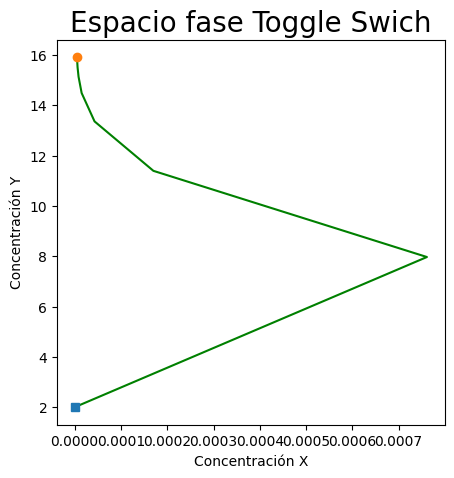

--------------------------------------------
[1, 9, 0, 7, 3, 1, 4]


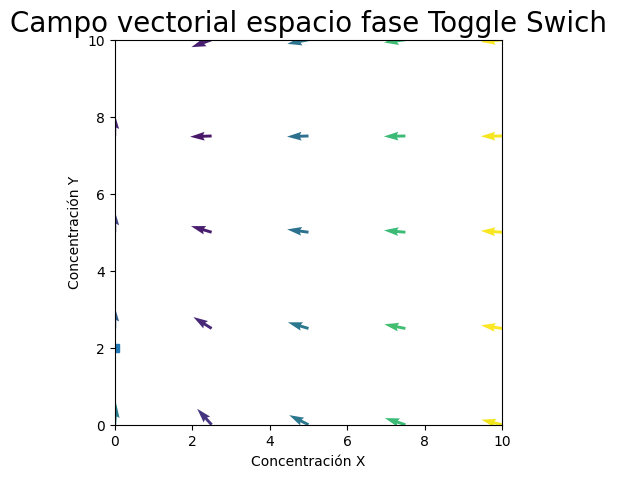

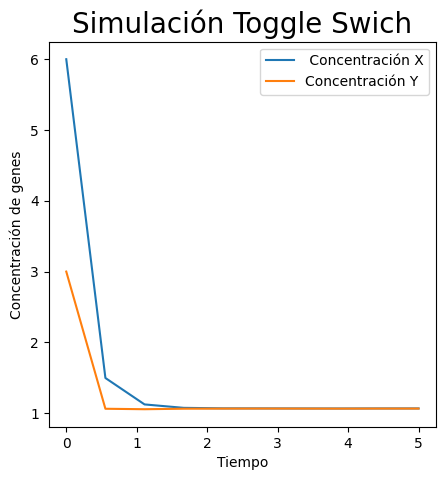

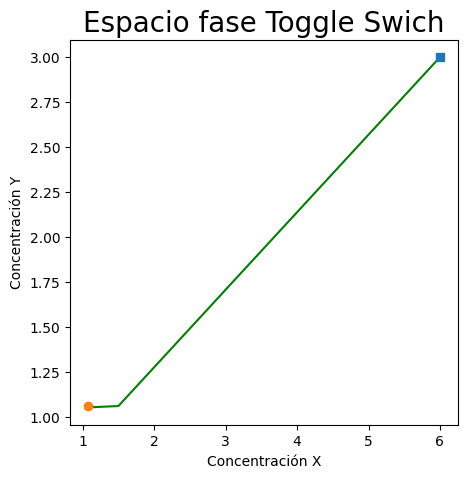

--------------------------------------------
[5, 1, 2, 7, 4, 7, 3]


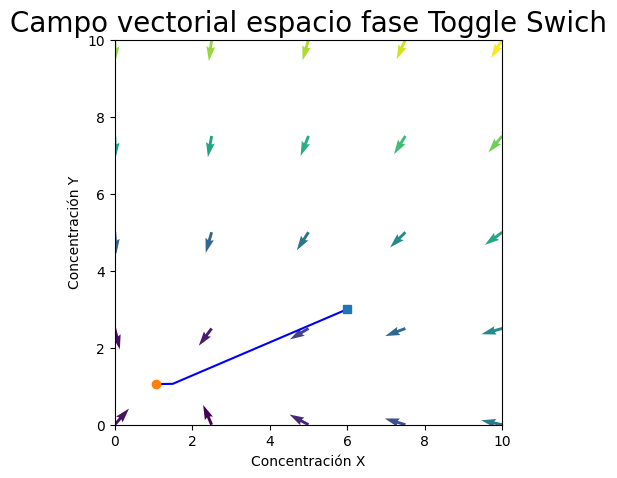

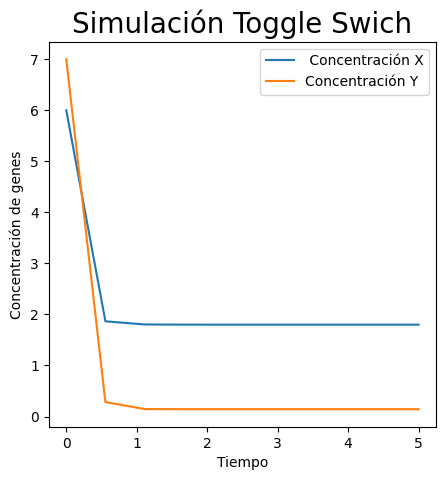

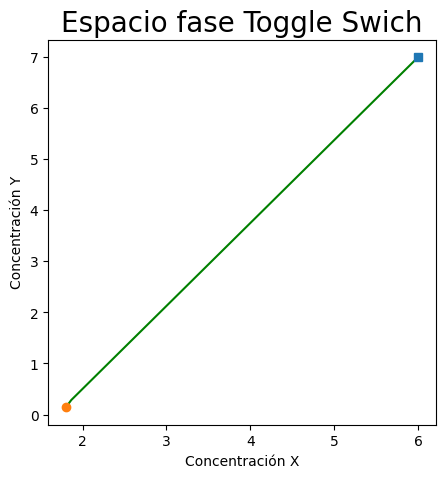

--------------------------------------------
[4, 0, 5, 1, 5, 7, 4]


KeyboardInterrupt: 

In [2]:
varf = []
campvec = []
coef = []
for i in range(0, 31):
    # constantes
    a1 = random.randint(0, 10)
    a2 = random.randint(0, 10)
    b1 = random.randint(0, 10)
    b2 = random.randint(0, 10)
    d1 = random.randint(0, 10)
    d2 = random.randint(0, 10)
    n = random.randint(0, 5)

    coef1 = [a1, a2, b1, b2, d1, d2, n]
    coef.append(coef1)

    def f(t, y):

        # asignar a cada ODE a un elemento de vector
        X = y[0]
        Y = y[1]

        # definimos cada ODE
        # dX_dt=a1/(1+Y**n)-d1*X+b1
        # dY_dt=a2/(1+X**n)-d2*Y+b2
        dX_dt = a1/(1+Y**n)-d1*X+b1
        dY_dt = a2/(1+X**n)-d2*Y+b2

        return [dX_dt, dY_dt]

    # Declaramos el vector de tiempo
    t_span = [0, 5]
    times = np.linspace(t_span[0], t_span[1], 10)

    varfci2 = []
    for i_ci in range(0, 1):
        # Definimos las condiciones iniciales
        y0 = np.array([random.randint(0, 10), random.randint(0, 10)])

        # Resolvemos
        # Modificar manualmente el intervalo de tiempo
        sol = solve_ivp(f, t_span, y0, t_eval=times)
        # sol=solve_ivp(f, t_span, y0) #Dejar que la librería elija el mejor intervalo
        tiempo = sol.t
        var1 = sol.y[0]
        var2 = sol.y[1]

        # Graficamos
        plt.figure(figsize=(5, 5))
        plt.plot(tiempo, var1, label=" Concentración X")
        plt.plot(tiempo, var2, label="Concentración Y")
        plt.xlabel('Tiempo')
        plt.ylabel('Concentración de genes')
        plt.title('Simulación Toggle Swich', fontsize=20)
        plt.legend()
        plt.show()

        plt.figure(figsize=(5, 5))
        plt.plot(var1, var2, "g")
        plt.plot(var1[0], var2[0], 's')  # start
        plt.plot(var1[-1], var2[-1], 'o')  # end
        plt.xlabel('Concentración X')
        plt.ylabel('Concentración Y')
        plt.title('Espacio fase Toggle Swich', fontsize=20)
        plt.show()

        varfci = np.append([var1], [var2], axis=0)
        varfci2.append(varfci)
        # Graficamos el campo vectorial

        x_range_neg = 0
        x_range_pos = 10
        y_range_neg = 0
        y_range_pos =10


        y1 = np.linspace(x_range_neg, x_range_pos, 5)
        y2 = np.linspace(y_range_neg, y_range_pos, 5)

        Y1, Y2 = np.meshgrid(y1, y2)

        t1 = 0

        u, v = np.zeros(Y1.shape), np.zeros(Y2.shape)

        NI, NJ = Y1.shape

        u1, v1 = f(t1, [Y1, Y2])
        u, v = f(t1, [Y1, Y2])
        M = (np.hypot(u, v))
        u /= M
        v /= M

        plt.figure(figsize=(5, 5))
        plt.plot(sol.y[0], sol.y[1], 'b-')  # path
        plt.plot([sol.y[0, 0]], [sol.y[1, 0]], 's')  # start
        plt.plot([sol.y[0, -1]], [sol.y[1, -1]], 'o')  # end
        Q = plt.quiver(Y1, Y2, u, v, M, angles='xy')
        plt.title('Campo vectorial espacio fase Toggle Swich', fontsize=20)
        plt.xlim([x_range_neg, x_range_pos])
        plt.ylim([y_range_neg, y_range_pos])
        plt.xlabel('Concentración X')
        plt.ylabel('Concentración Y')

    campvecci = np.append([u1], [v1], axis=0)

    varf.append(varfci2)
    campvec.append(campvecci)
    print('--------------------------------------------')
    print(coef1)

df = pd.DataFrame(varf)

# Creamos base de datos de las solcuiones

In [7]:
varf = []
coef = []
contador = 0
for i in range(0, 1000):
    # constantes
    a1 = random.randint(1, 10)
    a2 = random.randint(1, 10)
    b1 = random.randint(0, 10)
    b2 = random.randint(0, 10)
    d1 = random.randint(0, 10)
    d2 = random.randint(0, 10)
    n = random.randint(1, 5)

    coef1 = [a1, a2, b1, b2, d1, d2, n]
    coef.append(coef1)

    def f(t, y):

        # asignar a cada ODE a un elemento de vector
        X = y[0]
        Y = y[1]

        # definimos cada ODE
        # dX_dt=a1/(1+Y**n)-d1*X+b1
        # dY_dt=a2/(1+X**n)-d2*Y+b2
        dX_dt = a1/(1+Y**n)-d1*X+b1
        dY_dt = a2/(1+X**n)-d2*Y+b2

        return [dX_dt, dY_dt]

    # Declaramos el vector de tiempo
    t_span = [0, 5]
    times = np.linspace(t_span[0], t_span[1], 10)

    varfci2 = []
    for i_ci in range(0, 10):
        # Definimos las condiciones iniciales
        y0 = np.array([random.randint(0, 10), random.randint(0, 10)])

        # Resolvemos
        # Modificar manualmente el intervalo de tiempo
        sol = solve_ivp(f, t_span, y0, t_eval=times)
        # sol=solve_ivp(f, t_span, y0) #Dejar que la librería elija el mejor intervalo
        tiempo = sol.t
        var1 = sol.y[0]
        var2 = sol.y[1]

        varfci = np.append([var1], [var2], axis=0)
        varfci2.append(varfci)

       

    varf.append(varfci2)
    print('--------------------------------------------')
    print(coef1)
    contador = contador+1
    print(contador)

varf = np.array(varf)
np.save(os.path.join(pathtrayec, 'varftest'), varf)
coef = np.array(coef)
np.save(os.path.join(pathtrayec, 'coefvarftest'),coef)

--------------------------------------------
[7, 10, 10, 2, 4, 8, 1]
1
--------------------------------------------
[4, 1, 7, 7, 6, 7, 3]
2
--------------------------------------------
[5, 9, 8, 6, 3, 10, 5]
3
--------------------------------------------
[7, 4, 3, 9, 9, 6, 1]
4
--------------------------------------------
[3, 8, 4, 8, 1, 0, 3]
5
--------------------------------------------
[8, 10, 10, 4, 6, 3, 4]
6
--------------------------------------------
[4, 3, 3, 2, 7, 1, 3]
7
--------------------------------------------
[7, 8, 3, 4, 2, 6, 4]
8
--------------------------------------------
[4, 3, 7, 10, 5, 4, 5]
9
--------------------------------------------
[4, 10, 5, 5, 2, 7, 4]
10
--------------------------------------------
[5, 2, 7, 6, 6, 3, 4]
11
--------------------------------------------
[5, 8, 8, 4, 2, 3, 1]
12
--------------------------------------------
[5, 8, 5, 2, 8, 8, 5]
13
--------------------------------------------
[10, 10, 8, 0, 7, 9, 4]
14
--------------------

--------------------------------------------
[8, 2, 3, 1, 10, 2, 3]
142
--------------------------------------------
[6, 1, 10, 0, 2, 0, 4]
143
--------------------------------------------
[5, 9, 3, 3, 9, 2, 1]
144
--------------------------------------------
[3, 6, 2, 4, 7, 7, 1]
145
--------------------------------------------
[6, 2, 7, 9, 0, 5, 2]
146
--------------------------------------------
[5, 5, 6, 1, 3, 4, 5]
147
--------------------------------------------
[7, 3, 2, 4, 4, 10, 3]
148
--------------------------------------------
[7, 1, 7, 2, 5, 1, 2]
149
--------------------------------------------
[3, 3, 6, 2, 10, 9, 3]
150
--------------------------------------------
[10, 5, 3, 3, 4, 2, 4]
151
--------------------------------------------
[6, 5, 2, 4, 10, 8, 4]
152
--------------------------------------------
[1, 9, 6, 4, 10, 7, 3]
153
--------------------------------------------
[3, 5, 0, 8, 7, 8, 1]
154
--------------------------------------------
[3, 8, 9, 8, 2, 0, 5]
155

--------------------------------------------
[2, 1, 0, 0, 9, 2, 3]
274
--------------------------------------------
[9, 8, 10, 2, 6, 8, 4]
275
--------------------------------------------
[8, 1, 2, 5, 7, 4, 2]
276
--------------------------------------------
[2, 6, 0, 5, 9, 10, 1]
277
--------------------------------------------
[2, 5, 3, 1, 9, 7, 5]
278
--------------------------------------------
[4, 3, 4, 6, 10, 3, 4]
279
--------------------------------------------
[8, 1, 8, 9, 4, 0, 2]
280
--------------------------------------------
[3, 1, 1, 4, 4, 2, 3]
281
--------------------------------------------
[10, 7, 4, 3, 1, 7, 5]
282
--------------------------------------------
[6, 6, 9, 4, 3, 4, 3]
283
--------------------------------------------
[2, 7, 0, 2, 9, 6, 1]
284
--------------------------------------------
[10, 4, 0, 4, 4, 5, 1]
285
--------------------------------------------
[2, 6, 1, 2, 3, 8, 5]
286
--------------------------------------------
[10, 5, 0, 3, 6, 2, 4]
287


--------------------------------------------
[10, 2, 4, 2, 6, 6, 1]
389
--------------------------------------------
[3, 9, 8, 7, 7, 6, 4]
390
--------------------------------------------
[8, 10, 5, 6, 10, 7, 3]
391
--------------------------------------------
[3, 8, 9, 10, 10, 6, 4]
392
--------------------------------------------
[4, 9, 9, 1, 4, 1, 5]
393
--------------------------------------------
[3, 7, 8, 10, 6, 7, 1]
394
--------------------------------------------
[8, 3, 3, 9, 8, 8, 2]
395
--------------------------------------------
[10, 7, 3, 8, 10, 8, 3]
396
--------------------------------------------
[4, 1, 1, 10, 0, 9, 3]
397
--------------------------------------------
[6, 6, 3, 2, 1, 9, 4]
398
--------------------------------------------
[9, 10, 8, 10, 8, 5, 3]
399
--------------------------------------------
[3, 6, 10, 1, 1, 2, 4]
400
--------------------------------------------
[5, 7, 7, 6, 10, 0, 3]
401
--------------------------------------------
[3, 10, 4, 10, 5, 2

--------------------------------------------
[8, 3, 5, 2, 10, 7, 1]
508
--------------------------------------------
[2, 5, 6, 5, 9, 7, 4]
509
--------------------------------------------
[4, 10, 0, 7, 5, 9, 2]
510
--------------------------------------------
[6, 4, 10, 4, 8, 3, 3]
511
--------------------------------------------
[4, 9, 10, 8, 5, 0, 4]
512
--------------------------------------------
[10, 1, 9, 7, 6, 7, 5]
513
--------------------------------------------
[6, 4, 3, 1, 1, 5, 1]
514
--------------------------------------------
[9, 5, 8, 8, 9, 1, 1]
515
--------------------------------------------
[1, 2, 7, 10, 5, 7, 2]
516
--------------------------------------------
[2, 1, 9, 3, 7, 7, 5]
517
--------------------------------------------
[6, 1, 6, 9, 6, 2, 3]
518
--------------------------------------------
[3, 1, 1, 0, 5, 2, 4]
519
--------------------------------------------
[4, 7, 1, 2, 7, 2, 2]
520
--------------------------------------------
[2, 2, 3, 6, 1, 2, 4]
521


--------------------------------------------
[3, 9, 8, 7, 8, 7, 1]
629
--------------------------------------------
[10, 2, 4, 9, 3, 3, 1]
630
--------------------------------------------
[2, 4, 0, 10, 9, 4, 2]
631
--------------------------------------------
[1, 10, 3, 2, 10, 6, 4]
632
--------------------------------------------
[2, 5, 2, 0, 0, 6, 3]
633
--------------------------------------------
[8, 7, 9, 9, 2, 6, 1]
634
--------------------------------------------
[5, 3, 8, 5, 0, 0, 4]
635
--------------------------------------------
[3, 10, 6, 10, 7, 7, 1]
636
--------------------------------------------
[10, 3, 6, 8, 9, 6, 3]
637
--------------------------------------------
[7, 9, 3, 4, 9, 1, 5]
638
--------------------------------------------
[9, 9, 6, 9, 8, 7, 3]
639
--------------------------------------------
[7, 6, 2, 0, 4, 1, 2]
640
--------------------------------------------
[7, 2, 4, 1, 2, 0, 4]
641
--------------------------------------------
[10, 7, 1, 5, 9, 10, 2]
6

--------------------------------------------
[1, 10, 0, 1, 9, 3, 1]
751
--------------------------------------------
[8, 7, 0, 10, 0, 5, 5]
752
--------------------------------------------
[8, 5, 8, 6, 4, 0, 3]
753
--------------------------------------------
[3, 10, 9, 1, 8, 6, 2]
754
--------------------------------------------
[5, 3, 6, 0, 1, 0, 3]
755
--------------------------------------------
[5, 5, 10, 0, 9, 7, 4]
756
--------------------------------------------
[9, 9, 5, 8, 8, 6, 2]
757
--------------------------------------------
[9, 5, 0, 9, 4, 1, 1]
758
--------------------------------------------
[1, 9, 5, 2, 8, 4, 2]
759
--------------------------------------------
[3, 6, 6, 8, 9, 6, 1]
760
--------------------------------------------
[7, 3, 2, 9, 9, 7, 2]
761
--------------------------------------------
[6, 9, 2, 7, 3, 6, 5]
762
--------------------------------------------
[2, 8, 3, 1, 8, 8, 2]
763
--------------------------------------------
[7, 3, 5, 7, 6, 2, 2]
764
--

--------------------------------------------
[9, 1, 7, 9, 1, 0, 5]
872
--------------------------------------------
[2, 1, 6, 4, 6, 1, 4]
873
--------------------------------------------
[3, 2, 5, 1, 2, 2, 5]
874
--------------------------------------------
[2, 1, 2, 7, 0, 1, 1]
875
--------------------------------------------
[1, 10, 1, 3, 8, 3, 2]
876
--------------------------------------------
[10, 6, 5, 0, 4, 10, 2]
877
--------------------------------------------
[6, 8, 7, 0, 5, 7, 5]
878
--------------------------------------------
[8, 10, 4, 4, 8, 2, 4]
879
--------------------------------------------
[7, 7, 9, 4, 9, 0, 2]
880
--------------------------------------------
[4, 6, 6, 1, 0, 6, 3]
881
--------------------------------------------
[2, 4, 10, 0, 3, 6, 3]
882
--------------------------------------------
[5, 9, 2, 10, 2, 6, 1]
883
--------------------------------------------
[9, 4, 2, 4, 3, 5, 3]
884
--------------------------------------------
[4, 3, 1, 9, 5, 6, 4]
885


--------------------------------------------
[2, 7, 9, 5, 1, 3, 5]
992
--------------------------------------------
[2, 6, 10, 9, 10, 8, 1]
993
--------------------------------------------
[5, 5, 0, 1, 1, 8, 5]
994
--------------------------------------------
[1, 10, 10, 8, 10, 5, 2]
995
--------------------------------------------
[5, 4, 4, 10, 8, 6, 4]
996
--------------------------------------------
[6, 8, 7, 5, 4, 9, 4]
997
--------------------------------------------
[4, 9, 1, 8, 3, 0, 4]
998
--------------------------------------------
[8, 10, 6, 7, 4, 1, 4]
999
--------------------------------------------
[10, 10, 10, 3, 4, 1, 1]
1000


# Creamos base de datos espacio vectorial

In [10]:
campvec = []
coef = []
contador = 0
for i in range(0, 1000):
    # constantes
    a1 = random.randint(1, 10)
    a2 = random.randint(1, 10)
    b1 = random.randint(0, 10)
    b2 = random.randint(0, 10)
    d1 = random.randint(0, 10)
    d2 = random.randint(0, 10)
    n = random.randint(1, 5)

    coef1 = [a1, a2, b1, b2, d1, d2, n]
    coef.append(coef1)

    def f(t, y):

        # asignar a cada ODE a un elemento de vector
        X = y[0]
        Y = y[1]

        # definimos cada ODE
        # dX_dt=a1/(1+Y**n)-d1*X+b1
        # dY_dt=a2/(1+X**n)-d2*Y+b2
        dX_dt = a1/(1+Y**n)-d1*X+b1
        dY_dt = a2/(1+X**n)-d2*Y+b2

        return [dX_dt, dY_dt]

    x_range_neg = 0
    x_range_pos = 10
    y_range_neg = 0
    y_range_pos = 10

    y1 = np.linspace(x_range_neg, x_range_pos, 5)
    y2 = np.linspace(y_range_neg, y_range_pos, 5)

    Y1, Y2 = np.meshgrid(y1, y2)
    
    t1 = 0

    u, v = np.zeros(Y1.shape), np.zeros(Y2.shape)

    NI, NJ = Y1.shape

    u1, v1 = f(t1, [Y1, Y2])
    u, v = f(t1, [Y1, Y2])
    M = (np.hypot(u, v))
    u /= M
    v /= M

    campvecci = np.append([u1], [v1], axis=0)

    campvec.append(campvecci)
    print('--------------------------------------------')
    print(coef1)
    contador = contador+1
    print(contador)
    
campvec = np.array(campvec)
np.save(os.path.join(pathcampo,'campvecval'), campvec)
coef = np.array(coef)
np.save(os.path.join(pathcampo,'coefcampvecval'),coef)

--------------------------------------------
[9, 5, 10, 1, 1, 10, 1]
1
--------------------------------------------
[9, 8, 1, 2, 5, 1, 2]
2
--------------------------------------------
[1, 10, 1, 7, 0, 7, 3]
3
--------------------------------------------
[4, 7, 1, 4, 7, 7, 1]
4
--------------------------------------------
[4, 10, 4, 10, 5, 9, 4]
5
--------------------------------------------
[4, 2, 0, 9, 10, 8, 1]
6
--------------------------------------------
[4, 4, 9, 2, 6, 9, 2]
7
--------------------------------------------
[7, 9, 0, 1, 5, 3, 2]
8
--------------------------------------------
[5, 4, 8, 1, 2, 8, 1]
9
--------------------------------------------
[6, 6, 6, 7, 3, 10, 5]
10
--------------------------------------------
[4, 2, 8, 7, 2, 7, 2]
11
--------------------------------------------
[10, 10, 1, 6, 7, 4, 3]
12
--------------------------------------------
[6, 4, 8, 5, 1, 7, 1]
13
--------------------------------------------
[6, 10, 8, 4, 8, 7, 2]
14
-------------------

# Comprobamos que los datos se guardaron de manera correcta

## Datos Varf

In [12]:
varf = np.load(pathtrayec + '/varftrain.npy')

In [13]:
np.shape(varf)

(7000, 10, 2, 20)

## Coeficientes Varf

In [14]:
coefvarf = np.load(pathtrayec + '/coefvarftrain.npy')

In [15]:
np.shape(coefvarf)

(7000, 7)

## Datos Campvec

In [16]:
campvec = np.load(pathcampo+'/campvectrain.npy')

FileNotFoundError: [Errno 2] No such file or directory: '../Base de datos/Campo 10 puntos/campvectrain.npy'

In [ ]:
np.shape(campvec)

## Coeficientes Campvec

In [7]:
coefcampvec = np.load(pathcampo + '/coefcampvectrain.npy')

In [8]:
np.shape(coefcampvec)

(7000, 7)

# Volvemos a graficar

## Datos Varf

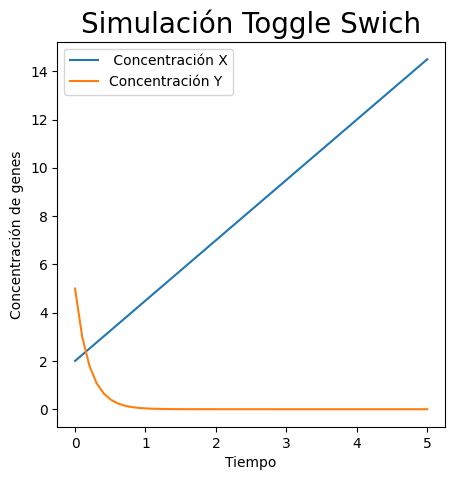

In [18]:
t_span = [0, 5]
times = np.linspace(t_span[0], t_span[1], 50)
plt.figure(figsize=(5,5))
plt.plot(times,np.array(varf)[0,0,0,:], label=" Concentración X")
plt.plot(times,np.array(varf)[0,0,1,:], label="Concentración Y")
plt.xlabel('Tiempo')
plt.ylabel('Concentración de genes')
plt.title('Simulación Toggle Swich', fontsize=20)
plt.legend()
plt.show()

## Coeficientes Varf

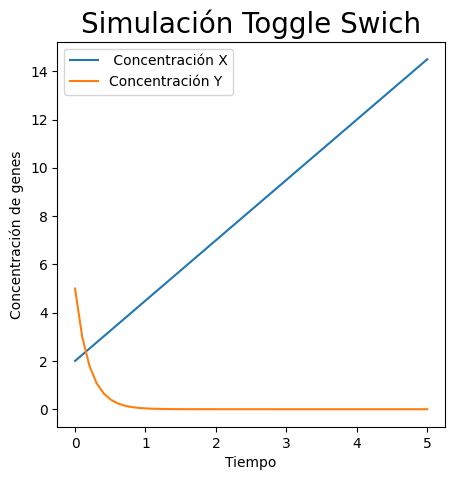

In [19]:
for i in range(0, 1):
    # constantes
    a1 = coefvarf[0,0]
    a2 = coefvarf[0,1]
    b1 = coefvarf[0,2]
    b2 = coefvarf[0,3]
    d1 = coefvarf[0,4]
    d2 = coefvarf[0,5]
    n = coefvarf[0,6]


    def f(t, y):

        # asignar a cada ODE a un elemento de vector
        X = y[0]
        Y = y[1]

        # definimos cada ODE
        dX_dt = a1/(1+Y**n)-d1*X+b1
        dY_dt = a2/(1+X**n)-d2*Y+b1

        return [dX_dt, dY_dt]

    # Declaramos el vector de tiempo
    t_span = [0, 5]
    times = np.linspace(t_span[0], t_span[1], 50)

    for i_ci in range(0, 1):
        # Definimos las condiciones iniciales
        y0 = (varf[0,0,0,0],varf[0,0,1,0])

        # Resolvemos
        # Modificar manualmente el intervalo de tiempo
        sol = solve_ivp(f, t_span, y0, t_eval=times)
        # sol=solve_ivp(f, t_span, y0) #Dejar que la librería elija el mejor intervalo
        tiempo = sol.t
        var1 = sol.y[0]
        var2 = sol.y[1]

        # Graficamos
        plt.figure(figsize=(5, 5))
        plt.plot(tiempo, var1, label=" Concentración X")
        plt.plot(tiempo, var2, label="Concentración Y")
        plt.xlabel('Tiempo')
        plt.ylabel('Concentración de genes')
        plt.title('Simulación Toggle Swich', fontsize=20)
        plt.legend()
        plt.show()

## Datos Campvec

Text(0, 0.5, 'Concentración Y')

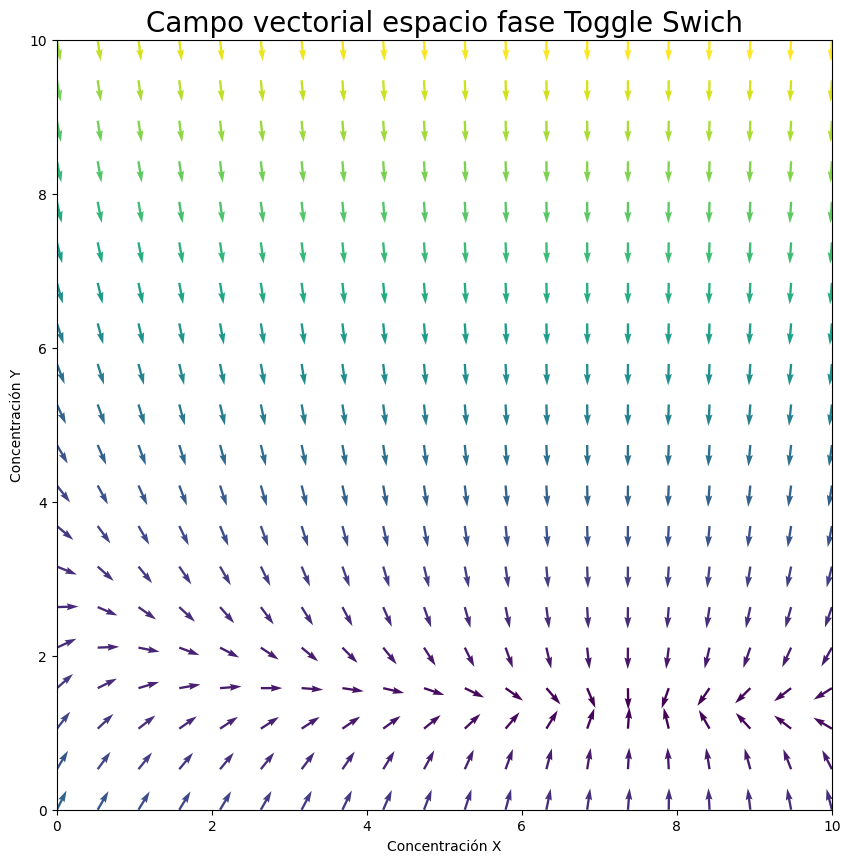

In [22]:
y1 = np.linspace(0, 10, 20)
y2 = np.linspace(0, 10, 20)
Y1, Y2 = np.meshgrid(y1, y2)
t1 = 0
u, v = np.zeros(Y1.shape), np.zeros(Y2.shape)
NI, NJ = Y1.shape        
u,v = np.array(campvec)[0,0,:,:], np.array(campvec)[0,1,:,:]
M = (np.hypot(u,v))
u /= M
v /= M

plt.figure(figsize=(10,10))
Q = plt.quiver(Y1, Y2, u, v, M, angles='xy')
plt.title('Campo vectorial espacio fase Toggle Swich', fontsize=20)
plt.xlim([0, 10])
plt.ylim([0, 10])
plt.xlabel('Concentración X')
plt.ylabel('Concentración Y')

## Coeficientes Campvec

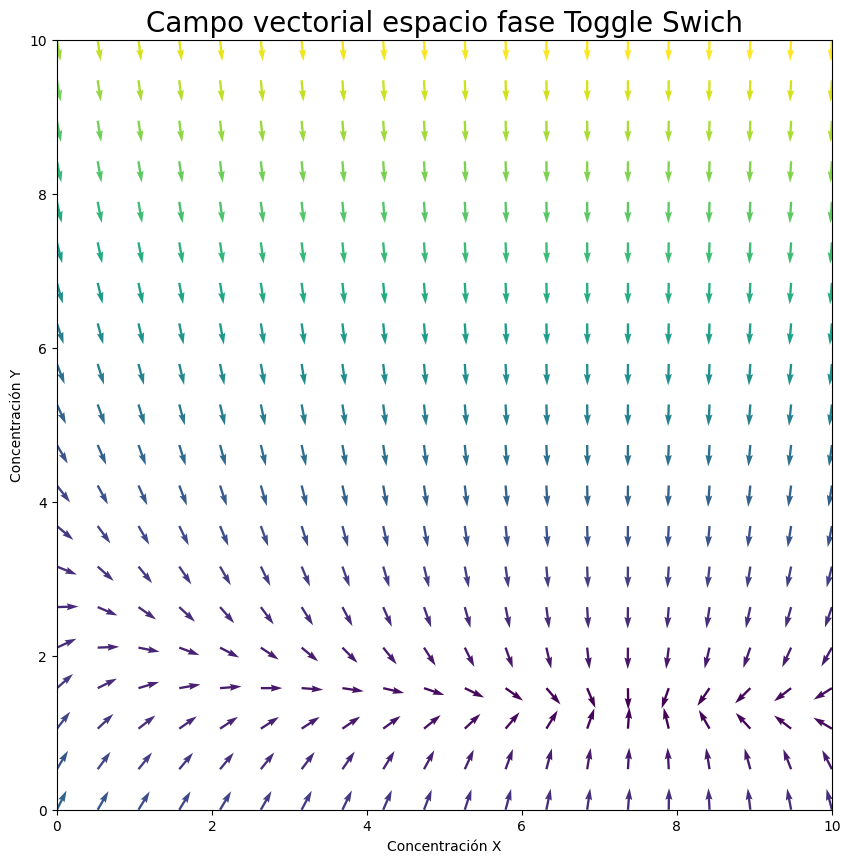

In [23]:
for i in range(0, 1):
    # constantes
    a1 = coefcampvec[0,0]
    a2 = coefcampvec[0,1]
    b1 = coefcampvec[0,2]
    b2 = coefcampvec[0,3]
    d1 = coefcampvec[0,4]
    d2 = coefcampvec[0,5]
    n = coefcampvec[0,6]



    def f(t, y):

        # asignar a cada ODE a un elemento de vector
        X = y[0]
        Y = y[1]

        # definimos cada ODE
        dX_dt = a1/(1+Y**n)-d1*X+b1
        dY_dt = a2/(1+X**n)-d2*Y+b1

        return [dX_dt, dY_dt]

    x_range_neg = 0
    x_range_pos = 10
    y_range_neg = 0
    y_range_pos =10

    y1 = np.linspace(x_range_neg, x_range_pos, 20)
    y2 = np.linspace(y_range_neg, y_range_pos, 20)

    Y1, Y2 = np.meshgrid(y1, y2)
    
    t1 = 0

    u, v = np.zeros(Y1.shape), np.zeros(Y2.shape)

    NI, NJ = Y1.shape

    u1, v1 = f(t1, [Y1, Y2])
    u, v = f(t1, [Y1, Y2])
    M = (np.hypot(u, v))
    u /= M
    v /= M

    plt.figure(figsize=(10,10))
    Q = plt.quiver(Y1, Y2, u, v, M, angles='xy')
    plt.title('Campo vectorial espacio fase Toggle Swich', fontsize=20)
    plt.xlim([0, 10])
    plt.ylim([0, 10])
    plt.xlabel('Concentración X')
    plt.ylabel('Concentración Y')
